In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import seaborn as sns
sns.set_theme(style="dark")
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [5]:
for i in [x_train,x_val,x_test]:
    i = i/255

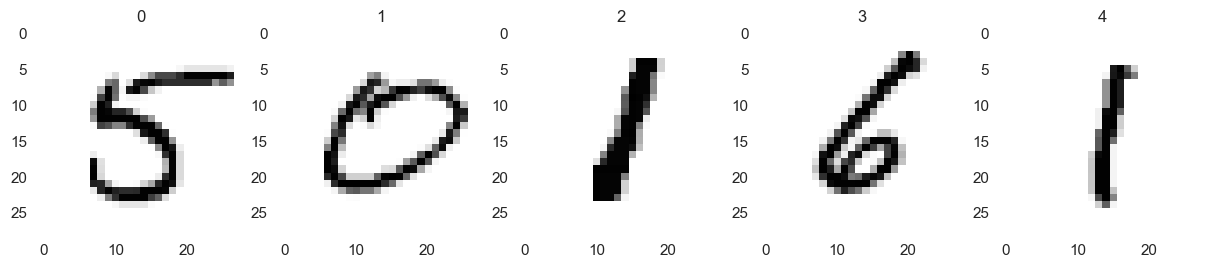

In [6]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(x_train[:5]):
    ax[idx].imshow(img,cmap = 'Grays')
    ax[idx].title.set_text(idx)

In [7]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
y_train = tf.one_hot(y_train,10)
y_val = tf.one_hot(y_val,10)
y_test = tf.one_hot(y_test,10)

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=64,validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 4s 3ms/step - loss: 0.0289 - accuracy: 0.9932 - val_loss: 0.2116 - val_accuracy: 0.9718
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0227 - accuracy: 0.9942 - val_loss: 0.1954 - val_accuracy: 0.9730
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0266 - accuracy: 0.9940 - val_loss: 0.1864 - val_accuracy: 0.9710
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0287 - accuracy: 0.9935 - val_loss: 0.1956 - val_accuracy: 0.9718
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0197 - accuracy: 0.9954 - val_loss: 0.2285 - val_accuracy: 0.9694
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0282 - accuracy: 0.9932 - val_loss: 0.1721 - val_accuracy: 0.9724
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0194 - accuracy: 0.9953 - val_loss: 0.2119 - val_accuracy: 0.9726
Epoch 

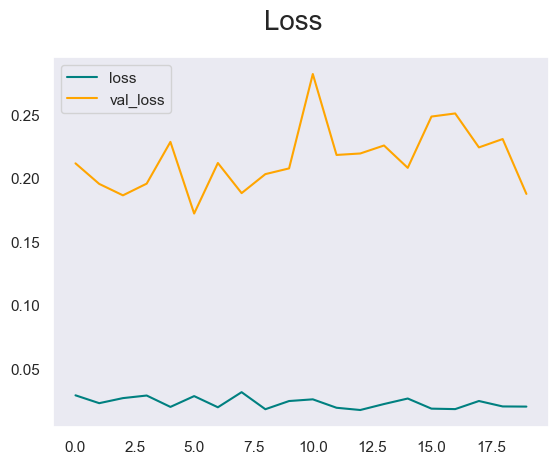

In [15]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

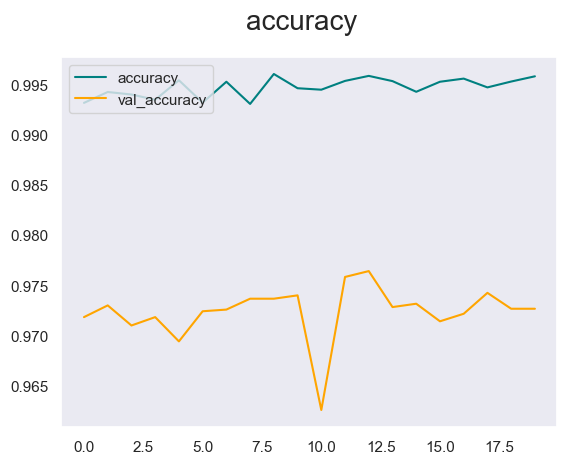

In [16]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
y_pred=np.argmax(model.predict(x_test),axis=1)
y_true = np.argmax(y_test, axis=1)
print("Accuracy:",accuracy_score(y_true, y_pred))

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9761


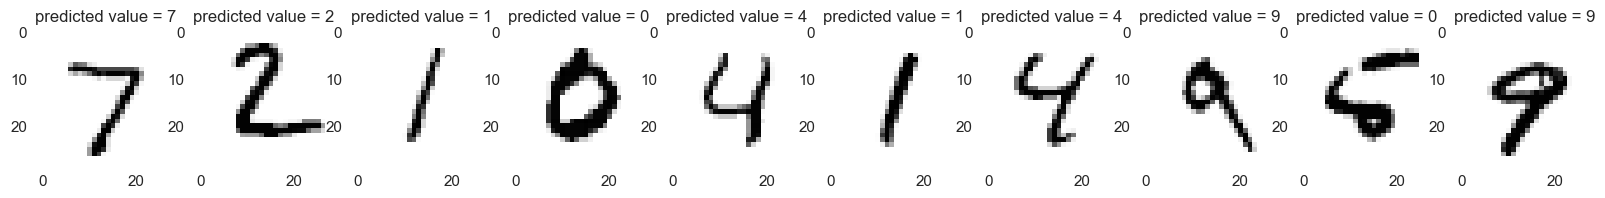

In [37]:
fig, ax = plt.subplots(ncols=10, figsize=(20,15))
for idx, img in enumerate(x_test[:10]):
    ax[idx].imshow(img,cmap = 'Grays')
    ax[idx].title.set_text(f'predicted value = {y_pred[idx]}')